<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_07_derivadas.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 7
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por: 


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo [misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

3. Calcular el campo para diferentes valores de z con z>0,,  empleando misc derivative. Construya un grafico de E vs z.

4. Entender la generalizacion de la siguiente función, y aplicarla para calcular la derivada.


```python
import numpy as np
from scipy import misc
def derivative(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] ## force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

assert isinstance(derivative(np.sin,1,dx=1E-6),float)

```

In [ ]:
import numpy as np
from scipy import misc
import scipy
import sympy as sp
import matplotlib.pyplot as plt


In [ ]:
def valor(z):
  r = 0.1
  v1 = z/sp.sqrt((z**2 + r**2))
  return v1


In [ ]:
z= sp.Symbol("z")
dff= sp.diff(valor(z),z)

In [ ]:
a = sp.lambdify(z,dff,"numpy")

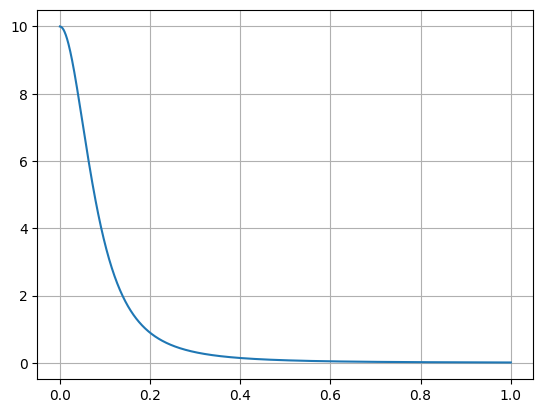

In [ ]:
z_=np.linspace(0,1,1000)
plt.plot(z_,a(z_))
plt.grid()

In [ ]:
k=1
q=1
R=0.1e-3
def potencial(z,R):
  return z/ np.sqrt(z**2 + R**2)

<ipython-input-8-26c561ce684e>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  misc.derivative(potencial,0.0002,dx=1e-8,args=(R,))


894.4271936817128

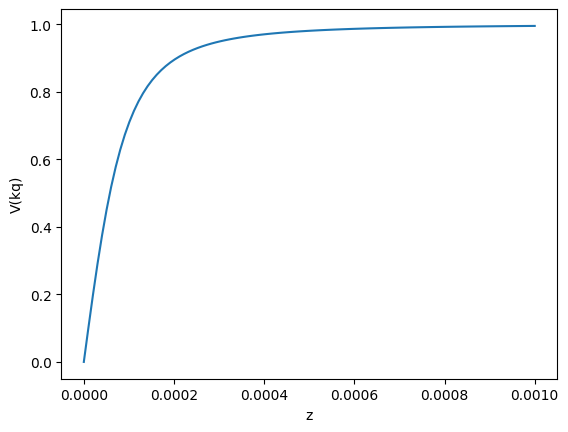

In [ ]:
z = np.linspace(0,0.001,100)
plt.plot(z,potencial(z,R))
plt.ylabel("V(kq)")
plt.xlabel("z")
misc.derivative(potencial,0.0002,dx=1e-8,args=(R,))

In [ ]:
for i in z:
  a=misc.derivative(potencial,i,dx=1e-8,args=(R,))
  print(a)

9999.999950000001
9848.883288337413
9417.626463070761
8765.345447120377
7970.602750559386
7112.052536165092
6254.603356148358
5443.588255005238
4705.359954476628
4051.2556194749473
3482.3698955743776
2993.709584259152
2577.244479523566
2223.895086783667
1924.6972790931682
1671.4047565646872
1456.7408210652832
1274.4485422211405
1119.235487806458
986.6710015071777
873.0688429658961
775.3724238168669
691.0507058643933
618.0076967732261
554.5057765843353
499.10179137357954
450.5943348387387
407.9805350776233
370.42076216908805
337.2098551224223
307.7536732065678
281.54997485096976
258.17280484008444
237.25972237431668
218.50132996825698
201.63266680195412
186.42611555041987
172.685539973072
160.241425251062
148.9468378079728
138.67405622702833
129.31175331631906
120.76263223304018
112.94143750228969
105.77327675398429
99.19220040344179
93.13999643212334
87.5651646470299
82.42204153074972
77.67005149039719
73.27306468796202
69.19884466549675
65.41857242581273
61.90643505599169
58.639269406

<ipython-input-9-d94c2743b65b>:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  a=misc.derivative(potencial,i,dx=1e-8,args=(R,))


In [ ]:
misc.derivative(potencial,0.0002,dx=1e-8,args=(R,))

<ipython-input-10-ae6614f4780a>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  misc.derivative(potencial,0.0002,dx=1e-8,args=(R,))


894.4271936817128

In [ ]:
from scipy.misc import derivative

In [ ]:
def potencial(z,R, kq=1):
  V= z*kq/np.sqrt(z**2+R**2)
  return V

<ipython-input-17-70b5aa284728>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  E=derivative(potencial,z, dx=1E-6,args=(R,))


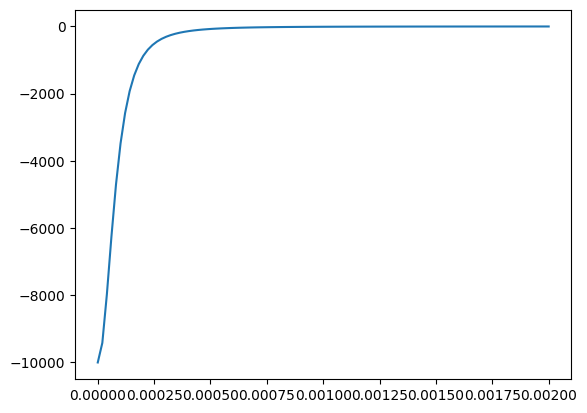

In [ ]:
z= np.linspace(0,0.002,100)
#z0=0.1
R= 0.1E-3

E=derivative(potencial,z, dx=1E-6,args=(R,))
plt.plot(z,-E)

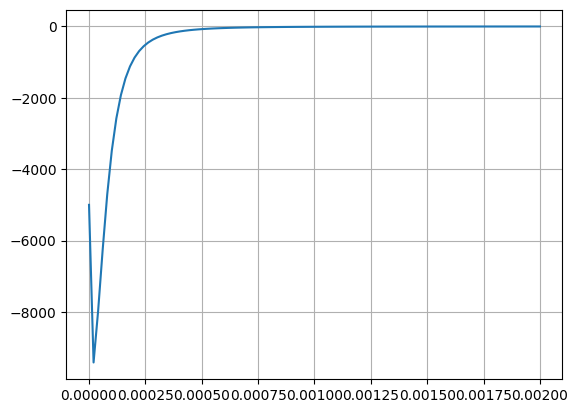

In [ ]:
from scipy.misc import derivative
def potencial(z,R,kq):
  if (z>=0):
    V= z*kq/np.sqrt(z**2+R**2)
  else:
    V=0
  return V

z= np.linspace(0,0.002,100)
R= 0.1E-3
kq=1 

derivative = np.vectorize(derivative,excluded=["args"])  #vectorizar ()
gradV = derivative(potencial,z, dx=1E-6, args=(R,kq))
campoelectrico = -gradV
plt.plot(z,campoelectrico)
plt.grid()

In [ ]:
from scipy.misc import derivative
def potencial(z,R,kq, select):
  if (select=="anillo"):
    V= z*kq/np.sqrt(z**2+R**2)
  elif (select=="disco"):
    V= (2*kq/R**2)*(np.sqrt(z**2 + R**2)-z)
  else:
    print("error, la palabra select debe ser anillo o disco")
    V= None
  return V

z= np.linspace(0,0.002,100)
R= 0.1E-3
kq=1 

potencial(0.001,0.1E-3,kq=1,select="disco")

997.5124224177994

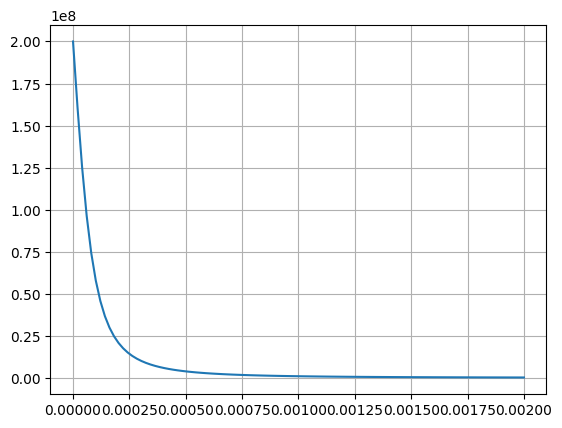

In [ ]:
z= np.linspace(0,0.002,100)
R= 0.1E-3
kq=1 
select="disco"
derivative = np.vectorize(derivative,excluded=["args"])  #vectorizar ()
gradV = derivative(potencial,z, dx=1E-6, args=(R,kq,select))
campoelectrico = -gradV
plt.plot(z,campoelectrico)
plt.grid()

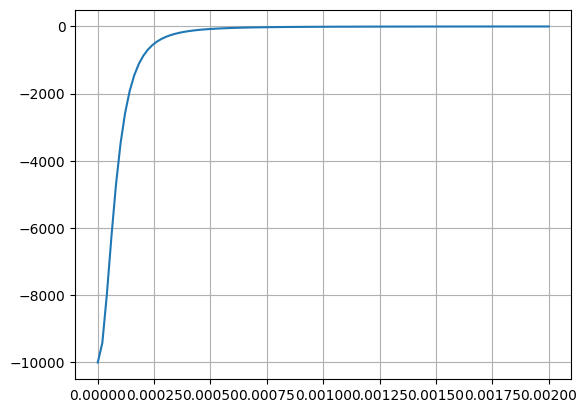

In [ ]:
z= np.linspace(0,0.002,100)
R= 0.1E-3
kq=1 
select="anillo"
derivative = np.vectorize(derivative,excluded=["args"])  #vectorizar ()
gradV = derivative(potencial,z, dx=1E-6, args=(R,kq,select))
campoelectrico = -gradV
plt.plot(z,campoelectrico)
plt.grid()

In [ ]:
z= np.linspace(0,0.002,100)
R= 0.1E-3
kq=1 
select="otra cosa"
derivative = np.vectorize(derivative,excluded=["args"])  #vectorizar ()
try:
  gradV = derivative(potencial,z, dx=1E-6, args=(R,kq,select))
  campoelectrico = -gradV
except:
  print("error, la palabra select debe ser anillo o disco")


error, la palabra select debe ser anillo o disco
error, la palabra select debe ser anillo o disco


In [ ]:
#programa
from scipy.misc import derivative


z= np.linspace(0,0.002,100)
R= 0.1E-3
kq=1 


def potencial(z,R,kq, select):
  if (select=="anillo"):
    V= z*kq/np.sqrt(z**2+R**2)
  elif (select=="disco"):
    V= (2*kq/R**2)*(np.sqrt(z**2 + R**2)-z)
  else:
    #print("error, la palabra select debe ser anillo o disco")
    V= None
  return V

derivative = np.vectorize(derivative,excluded=["args"])  #vectorizar ()
try:
  gradV = derivative(potencial,z, dx=1E-6, args=(R,kq,select))
  campoelectrico = -gradV
except:
  print("error, la palabra select debe ser anillo o disco")



In [ ]:
np.savetxt( "campo_electrico.txt",campoelectrico)